# Data processing

## loading packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

*findings* :
* segment 5 are all missing value, columns value has missing value filled with 0.
* dataset has multipul targets, and all target variables are catigorical variables. Encoded them to dummy variables.
* original time series is non stationary, can use log transformation/difference make it stationary.
* Time features are cyclical, the feature days cycles between 17th and 20 th for every month
* final dataset will be df_new4


## preprocessing

In [79]:
df = pd.read_csv('mrrFinalInput_csv.csv')
df.head()

,Unnamed: 0,Customer Code,Segment 1,Segment 2,Segment 3,Segment 4,Segment 5,1/17/2022,2/17/2022,3/17/2022,...,3/20/2022,4/20/2022,5/20/2022,6/20/2022,7/20/2022,8/20/2022,9/20/2022,10/20/2022,11/20/2022,12/20/2022
0,0,Customer1,Subscription,USA,SMB,Analytics Module,NaN,182,182,182,...,1070,1070,833,873,897,825,816,816,833,861
1,1,Customer2,Subscription,USA,Enterprise,Platform,NaN,4801,4801,4801,...,3280,3212,3442,3521,3616,3591,3550,3551,3886,4014
2,2,Customer3,Subscription,USA,Enterprise,Platform,NaN,310,310,310,...,\t-,\t-,\t-,\t-,\t-,\t-,\t-,\t-,\t-,\t-
3,3,Customer4,Subscription,Canada,Enterprise,Platform,NaN,120,417,719,...,834,834,834,834,834,834,834,834,834,834
4,4,Customer5,Subscription,USA,Enterprise,Platform,NaN,3235,3235,3235,...,4860,4860,5302,5302,5302,5302,5302,6399,6399,6400


In [80]:
df.dtypes

Unnamed: 0         int64
Customer Code     object
Segment 1         object
Segment 2         object
Segment 3         object
Segment 4         object
Segment 5        float64
1/17/2022         object
2/17/2022         object
3/17/2022         object
4/17/2022         object
5/17/2022         object
6/17/2022         object
7/17/2022         object
8/17/2022         object
9/17/2022         object
10/17/2022        object
11/17/2022        object
12/17/2022        object
1/18/2022         object
2/18/2022         object
3/18/2022         object
4/18/2022         object
5/18/2022         object
6/18/2022         object
7/18/2022         object
8/18/2022         object
9/18/2022         object
10/18/2022        object
11/18/2022        object
12/18/2022        object
1/19/2022         object
2/19/2022         object
3/19/2022         object
4/19/2022         object
5/19/2022         object
6/19/2022         object
7/19/2022         object
8/19/2022         object
9/19/2022         object


In [122]:
df['Customer Code'].unique()

array(['Customer1', 'Customer2', 'Customer3', 'Customer4', 'Customer5',
       'Customer6', 'Customer7', 'Customer8', 'Customer9', 'Customer10',
       'Customer11', 'Customer12', 'Customer13', 'Customer14',
       'Customer15', 'Customer16', 'Customer17', 'Customer18',
       'Customer19', 'Customer20', 'Customer21', 'Customer22',
       'Customer23', 'Customer24', 'Customer25', 'Customer26',
       'Customer27', 'Customer28', 'Customer29', 'Customer30',
       'Customer31', 'Customer32', 'Customer33', 'Customer34',
       'Customer35', 'Customer36', 'Customer37', 'Customer38',
       'Customer39', 'Customer40', 'Customer41', 'Customer42',
       'Customer43', 'Customer44', 'Customer45', 'Customer46',
       'Customer47', 'Customer48', 'Customer49', 'Customer50',
       'Customer51', 'Customer52', 'Customer53', 'Customer54',
       'Customer55', 'Customer56', 'Customer57', 'Customer58',
       'Customer59', 'Customer60', 'Customer61', 'Customer62',
       'Customer63', 'Customer64', '

As we can see the date information are all shown as column names, since we will need time information to make forcasting, therefore a date column is needed.

### create date column

In [3]:
from datetime import datetime, date
df_test1 = (df.melt(['Unnamed: 0','Customer Code','Segment 1','Segment 2','Segment 3','Segment 4','Segment 5'], var_name='date')
        .assign(date = lambda x: pd.to_datetime(x['date'],format='%m/%d/%Y'))
        )

In [4]:
df_test1.dtypes
# check the data type of new date column

Unnamed: 0                int64
Customer Code            object
Segment 1                object
Segment 2                object
Segment 3                object
Segment 4                object
Segment 5               float64
date             datetime64[ns]
value                    object
dtype: object

In [5]:
df_test1.head()
# check the data

,Unnamed: 0,Customer Code,Segment 1,Segment 2,Segment 3,Segment 4,Segment 5,date,value
0,0,Customer1,Subscription,USA,SMB,Analytics Module,NaN,2022-01-17,182
1,1,Customer2,Subscription,USA,Enterprise,Platform,NaN,2022-01-17,"4,801"
2,2,Customer3,Subscription,USA,Enterprise,Platform,NaN,2022-01-17,310
3,3,Customer4,Subscription,Canada,Enterprise,Platform,NaN,2022-01-17,120
4,4,Customer5,Subscription,USA,Enterprise,Platform,NaN,2022-01-17,"3,235"


### missing values

In [6]:
#check null value
df_test1.isna().sum()


Unnamed: 0          0
Customer Code       0
Segment 1           0
Segment 2           0
Segment 3           0
Segment 4           0
Segment 5        4512
date                0
value               0
dtype: int64

In [7]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     4512 non-null   int64         
 1   Customer Code  4512 non-null   object        
 2   Segment 1      4512 non-null   object        
 3   Segment 2      4512 non-null   object        
 4   Segment 3      4512 non-null   object        
 5   Segment 4      4512 non-null   object        
 6   Segment 5      0 non-null      float64       
 7   date           4512 non-null   datetime64[ns]
 8   value          4512 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 317.4+ KB


Segmaent 5 has no information stored.

In [23]:
#drop segment 5
df_test1 = df_test1.drop(['Segment 5'], axis = 1)

### data encoding

Target variable Segment 1,2,3,4 are categorical variables, in order to fit various model, we could encode these features.

In [8]:
#check unique variables 
df_test1['Segment 1'].unique()

array(['Subscription', 'Maintenance'], dtype=object)

In [9]:
df_test1['Segment 2'].unique()

array(['USA', 'Canada', 'Australia'], dtype=object)

In [10]:
df_test1['Segment 3'].unique()

array(['SMB', 'Enterprise', 'Mid-Market'], dtype=object)

In [11]:
df_test1['Segment 4'].unique()

array(['Analytics Module', 'Platform'], dtype=object)

In [15]:

# categorical features
df_test2 = df_test1[['Segment 1','Segment 2','Segment 3','Segment 4']]
df_test2.head()

,Segment 1,Segment 2,Segment 3,Segment 4
0,Subscription,USA,SMB,Analytics Module
1,Subscription,USA,Enterprise,Platform
2,Subscription,USA,Enterprise,Platform
3,Subscription,Canada,Enterprise,Platform
4,Subscription,USA,Enterprise,Platform


In [17]:
# encoding
pd.get_dummies(df_test2).head()

,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,Segment 3_Mid-Market,Segment 3_SMB,Segment 4_Analytics Module,Segment 4_Platform
0,0,1,0,0,1,0,0,1,1,0
1,0,1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,1,0,0,0,1
3,0,1,0,1,0,1,0,0,0,1
4,0,1,0,0,1,1,0,0,0,1


In [24]:
# new dataset with encoded features
df_new1 = pd.concat([df_test1,pd.get_dummies(df_test2)],axis=1)
df_new1.head()

,Unnamed: 0,Customer Code,Segment 1,Segment 2,Segment 3,Segment 4,date,value,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,Segment 3_Mid-Market,Segment 3_SMB,Segment 4_Analytics Module,Segment 4_Platform
0,0,Customer1,Subscription,USA,SMB,Analytics Module,2022-01-17,182,0,1,0,0,1,0,0,1,1,0
1,1,Customer2,Subscription,USA,Enterprise,Platform,2022-01-17,"4,801",0,1,0,0,1,1,0,0,0,1
2,2,Customer3,Subscription,USA,Enterprise,Platform,2022-01-17,310,0,1,0,0,1,1,0,0,0,1
3,3,Customer4,Subscription,Canada,Enterprise,Platform,2022-01-17,120,0,1,0,1,0,1,0,0,0,1
4,4,Customer5,Subscription,USA,Enterprise,Platform,2022-01-17,"3,235",0,1,0,0,1,1,0,0,0,1


In [25]:
# the dataset only with encoded categorical features
df_new2 = df_new1.drop(['Segment 1','Segment 2','Segment 3','Segment 4'], axis =1)
df_new2.head()

,Unnamed: 0,Customer Code,date,value,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,Segment 3_Mid-Market,Segment 3_SMB,Segment 4_Analytics Module,Segment 4_Platform
0,0,Customer1,2022-01-17,182,0,1,0,0,1,0,0,1,1,0
1,1,Customer2,2022-01-17,"4,801",0,1,0,0,1,1,0,0,0,1
2,2,Customer3,2022-01-17,310,0,1,0,0,1,1,0,0,0,1
3,3,Customer4,2022-01-17,120,0,1,0,1,0,1,0,0,0,1
4,4,Customer5,2022-01-17,"3,235",0,1,0,0,1,1,0,0,0,1


In [33]:
# dataset with day of week
# Monday =0, Sunday =6
df_new3 = df_new2

df_new3['day_of_week'] = df_new3['date'].dt.weekday 
df_new3.head()

,Unnamed: 0,Customer Code,date,value,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,Segment 3_Mid-Market,Segment 3_SMB,Segment 4_Analytics Module,Segment 4_Platform,day_of_week
0,0,Customer1,2022-01-17,182,0,1,0,0,1,0,0,1,1,0,0
1,1,Customer2,2022-01-17,"4,801",0,1,0,0,1,1,0,0,0,1,0
2,2,Customer3,2022-01-17,310,0,1,0,0,1,1,0,0,0,1,0
3,3,Customer4,2022-01-17,120,0,1,0,1,0,1,0,0,0,1,0
4,4,Customer5,2022-01-17,"3,235",0,1,0,0,1,1,0,0,0,1,0


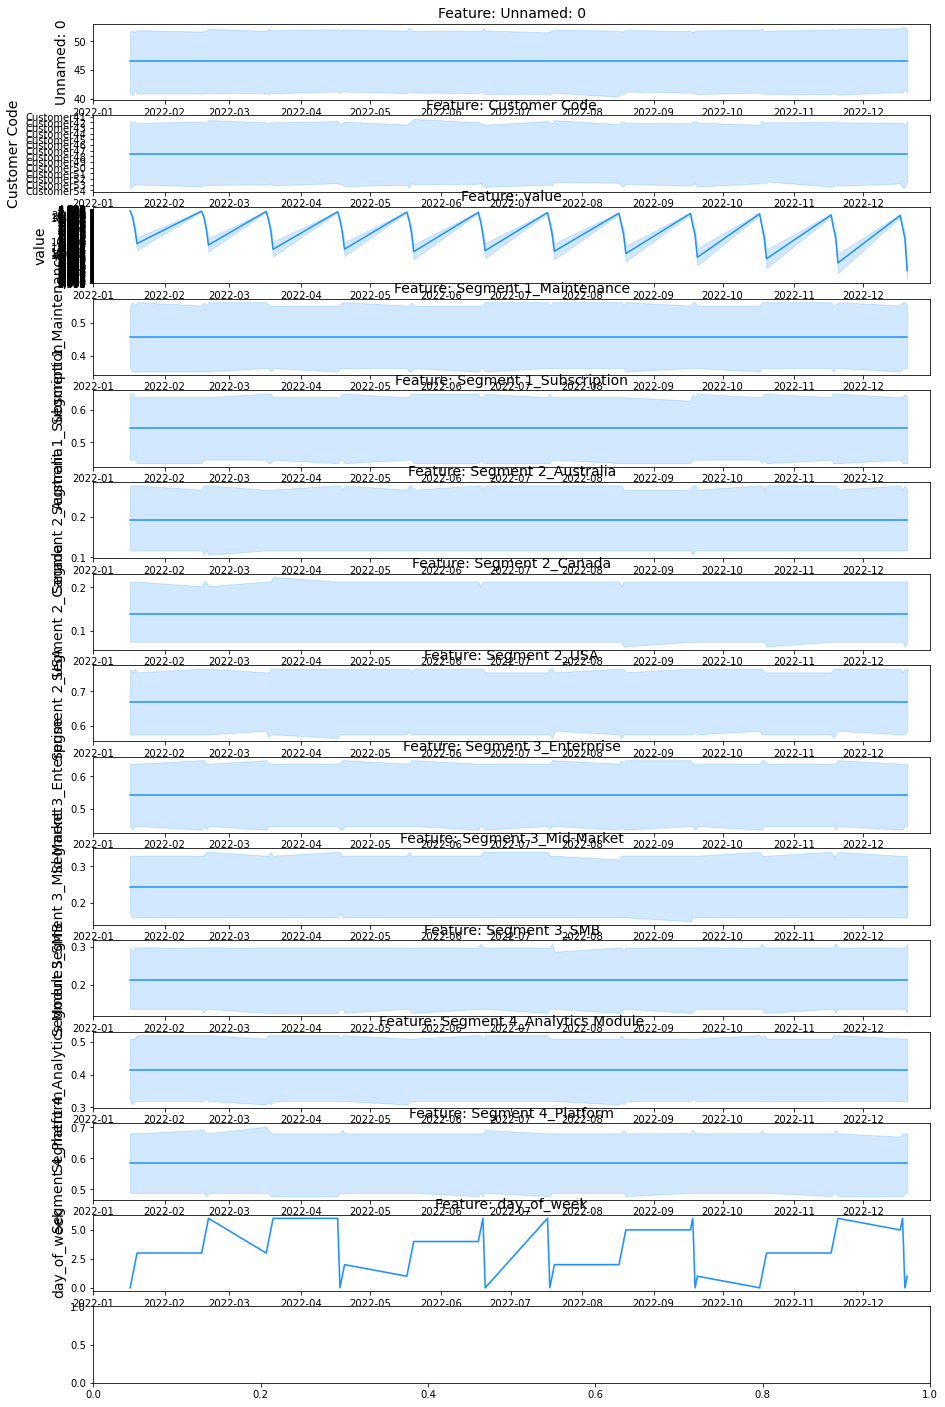

In [34]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=15, ncols=1, figsize=(15, 25))

for i, column in enumerate(df_new3.drop('date', axis=1).columns):
    sns.lineplot(x=df_new3['date'], y=df_new3[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2022, 1, 1), date(2022, 12, 30)])  

In [35]:
df_new3.describe()

,Unnamed: 0,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,Segment 3_Mid-Market,Segment 3_SMB,Segment 4_Analytics Module,Segment 4_Platform,day_of_week
count,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000
mean,46.500000,0.457447,0.542553,0.191489,0.138298,0.670213,0.542553,0.244681,0.212766,0.414894,0.585106,3.062500
std,27.136934,0.498241,0.498241,0.393517,0.345251,0.470188,0.498241,0.429945,0.409309,0.492758,0.492758,2.055772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,46.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000
max,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [123]:
df_new3['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93], dtype=int64)

In [42]:
df_new3.dtypes

Unnamed: 0                             int64
Customer Code                         object
date                          datetime64[ns]
value                                 object
Segment 1_Maintenance                  uint8
Segment 1_Subscription                 uint8
Segment 2_Australia                    uint8
Segment 2_Canada                       uint8
Segment 2_USA                          uint8
Segment 3_Enterprise                   uint8
Segment 3_Mid-Market                   uint8
Segment 3_SMB                          uint8
Segment 4_Analytics Module             uint8
Segment 4_Platform                     uint8
day_of_week                            int64
dtype: object

In [81]:
# convert value's data type to numeric
df_new3['value'] = df_new3['value'].fillna(0).astype(int)

In [82]:
df_new3.head()

,Unnamed: 0,Customer Code,date,value,Segment 1_Maintenance,Segment 1_Subscription,Segment 2_Australia,Segment 2_Canada,Segment 2_USA,Segment 3_Enterprise,...,month,day,day_of_year,week_of_year,quarter,season,days_sin,days_cos,month_sin,month_cos
0,0,NaN,2022-01-17,182,0,1,0,0,1,0,...,1,17,17,3,1,1,-0.406737,-0.913545,0.5,0.866025
1,1,NaN,2022-01-17,0,0,1,0,0,1,1,...,1,17,17,3,1,1,-0.406737,-0.913545,0.5,0.866025
2,2,NaN,2022-01-17,310,0,1,0,0,1,1,...,1,17,17,3,1,1,-0.406737,-0.913545,0.5,0.866025
3,3,NaN,2022-01-17,120,0,1,0,1,0,1,...,1,17,17,3,1,1,-0.406737,-0.913545,0.5,0.866025
4,4,NaN,2022-01-17,0,0,1,0,0,1,1,...,1,17,17,3,1,1,-0.406737,-0.913545,0.5,0.866025


In [83]:
df_new3.value.isna().sum()

0

### check stationary

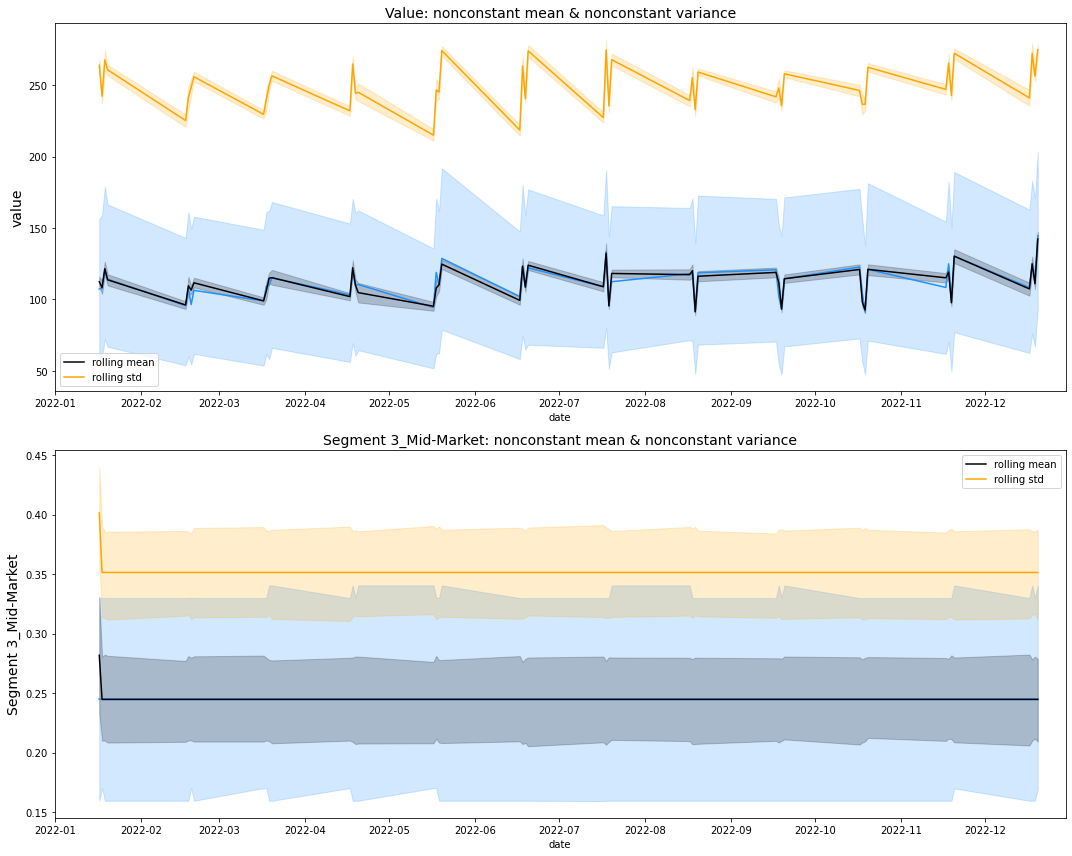

In [104]:
rolling_window = 52 # 52 weeks a year
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df_new3['date'], y=df_new3['value'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df_new3['date'], y=df_new3['value'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df_new3['date'], y=df_new3['value'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Value: nonconstant mean & nonconstant variance', fontsize=14)
ax[0].set_ylabel(ylabel='value', fontsize=14)
ax[0].set_xlim([date(2022, 1, 1), date(2022, 12, 30)])

sns.lineplot(x=df_new3['date'], y=df_new3['Segment 3_Mid-Market'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df_new3['date'], y=df_new3['Segment 3_Mid-Market'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df_new3['date'], y=df_new3['Segment 3_Mid-Market'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Segment 3_Mid-Market: nonconstant mean & nonconstant variance', fontsize=14)
ax[1].set_ylabel(ylabel='Segment 3_Mid-Market', fontsize=14)
ax[1].set_xlim([date(2022, 1, 1), date(2022, 12, 30)])

plt.tight_layout()
plt.show()

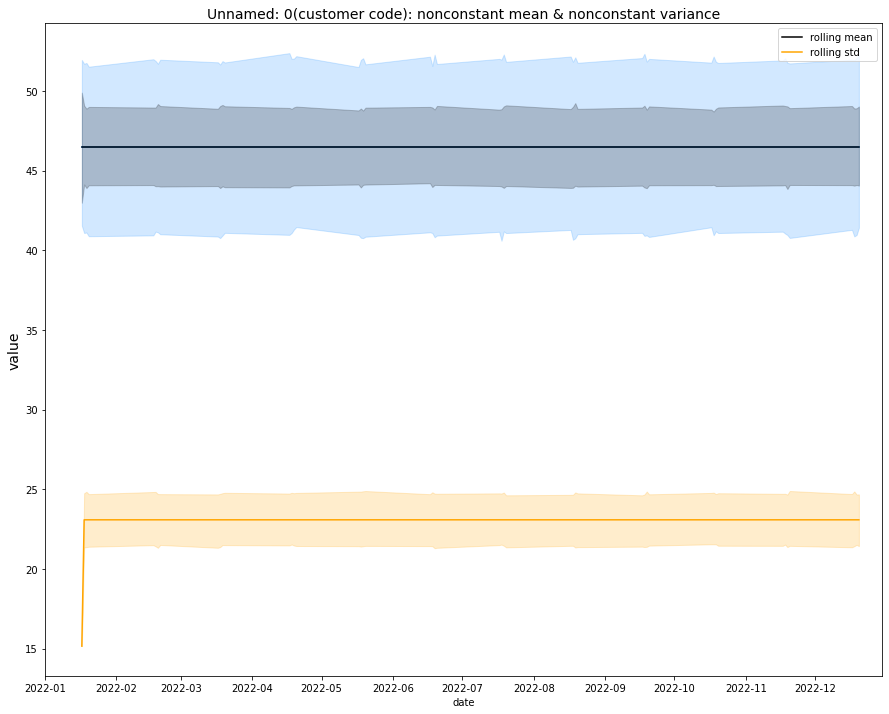

In [129]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
sns.lineplot(x=df_new3['date'], y=df_new3['Unnamed: 0'], color='dodgerblue')
sns.lineplot(x=df_new3['date'], y=df_new3['Unnamed: 0'].rolling(rolling_window).mean(),  color='black', label='rolling mean')
sns.lineplot(x=df_new3['date'], y=df_new3['Unnamed: 0'].rolling(rolling_window).std(), color='orange', label='rolling std')
ax.set_title('Unnamed: 0(customer code): nonconstant mean & nonconstant variance', fontsize=14)
ax.set_ylabel(ylabel='value', fontsize=14)
ax.set_xlim([date(2022, 1, 1), date(2022, 12, 30)])

plt.show()


seems the feature value is non stationary( use unit root test for double check), since the data is not stationary we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

Transformation: e.g. log or square root to stabilize non-constant variance
Differencing: subtracts the current value from the previous

### log transformation and difference

In [117]:
# First Order Differencing 
# will use Segment 3_Mid-Market
df_test2 = df_new3[['date','Segment 2_USA']]

In [118]:
df_test2['diff_1'] = df_test2['Segment 2_USA'].diff()


In [119]:
df_test2.tail()

,date,Segment 2_USA,diff_1
4507,2022-12-20,0,0.0
4508,2022-12-20,1,1.0
4509,2022-12-20,1,0.0
4510,2022-12-20,1,0.0
4511,2022-12-20,1,0.0


In [115]:
df_test2.isna().sum()

date                    0
Segment 3_Mid-Market    0
diff_1                  1
dtype: int64

### cyclincal feature

In [84]:
df_new4 = df_new3

In [53]:
# new dataset with expand time features
df_new4['year'] = pd.DatetimeIndex(df_new4['date']).year
df_new4['month'] = pd.DatetimeIndex(df_new4['date']).month
df_new4['day'] = pd.DatetimeIndex(df_new4['date']).day
df_new4['day_of_year'] = pd.DatetimeIndex(df_new4['date']).dayofyear
df_new4['week_of_year'] = pd.DatetimeIndex(df_new4['date']).weekofyear
df_new4['quarter'] = pd.DatetimeIndex(df_new4['date']).quarter
df_new4['season'] = df_new4['month'] % 12 // 3 + 1

df_new4[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2022-01-17,2022,1,17,17,3,1,1
1,2022-01-17,2022,1,17,17,3,1,1
2,2022-01-17,2022,1,17,17,3,1,1
3,2022-01-17,2022,1,17,17,3,1,1
4,2022-01-17,2022,1,17,17,3,1,1


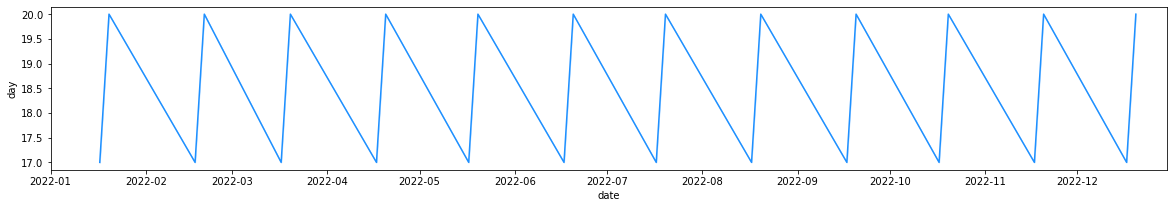

In [62]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df_new4['date'], y=df_new4['day'], color='dodgerblue')
ax.set_xlim([date(2022, 1, 1), date(2022, 12, 30)])
plt.show()
# this shows the featurew are cyclical each month

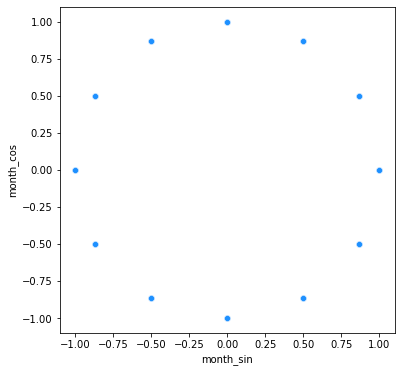

In [70]:
month_in_year = 12
df_new4['month_sin'] = np.sin(2*np.pi*df_new4['month']/month_in_year)
df_new4['month_cos'] = np.cos(2*np.pi*df_new4['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df_new4.month_sin, y=df_new4.month_cos, color='dodgerblue')
plt.show()

### timeseries decomposition

In [68]:
df_new4.columns

Index(['Unnamed: 0', 'Customer Code', 'date', 'value', 'Segment 1_Maintenance',
       'Segment 1_Subscription', 'Segment 2_Australia', 'Segment 2_Canada',
       'Segment 2_USA', 'Segment 3_Enterprise', 'Segment 3_Mid-Market',
       'Segment 3_SMB', 'Segment 4_Analytics Module', 'Segment 4_Platform',
       'day_of_week', 'year', 'month', 'day', 'day_of_year', 'week_of_year',
       'quarter', 'season', 'days_sin', 'days_cos'],
      dtype='object')

In [92]:
df_new4.isnull().sum()

Unnamed: 0                                   0
Customer Code                             4512
date                                         0
value                                        0
Segment 1_Maintenance                        0
                                          ... 
Segment 4_Platform_seasonal_shift_b_2m       8
Segment 4_Platform_seasonal_shift_b_1m       4
Segment 4_Platform_seasonal_shift_1m         4
Segment 4_Platform_seasonal_shift_2m         8
Segment 4_Platform_seasonal_shift_3m        12
Length: 103, dtype: int64

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Unnamed: 0','value', 'Segment 1_Maintenance',
       'Segment 1_Subscription', 'Segment 2_Australia', 'Segment 2_Canada',
       'Segment 2_USA', 'Segment 3_Enterprise', 'Segment 3_Mid-Market',
       'Segment 3_SMB', 'Segment 4_Analytics Module', 'Segment 4_Platform'
]

for column in core_columns:
    decomp = seasonal_decompose(df_new4[column], period=52, model='additive', extrapolate_trend='freq')
    df_new4[f"{column}_trend"] = decomp.trend
    df_new4[f"{column}_seasonal"] = decomp.seasonal

In [131]:
weeks_in_month = 4

for column in core_columns:
    df_new4[f'{column}_seasonal_shift_b_6m'] = df_new4[f'{column}_seasonal'].shift(-6 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_b_5m'] = df_new4[f'{column}_seasonal'].shift(-5 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_b_4m'] = df_new4[f'{column}_seasonal'].shift(-4 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_b_3m'] = df_new4[f'{column}_seasonal'].shift(-3 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_b_2m'] = df_new4[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_b_1m'] = df_new4[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_1m'] = df_new4[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_2m'] = df_new4[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_3m'] = df_new4[f'{column}_seasonal'].shift(3 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_4m'] = df_new4[f'{column}_seasonal'].shift(4 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_5m'] = df_new4[f'{column}_seasonal'].shift(5 * weeks_in_month)
    df_new4[f'{column}_seasonal_shift_6m'] = df_new4[f'{column}_seasonal'].shift(6 * weeks_in_month)

### Exploratory Data Analysis

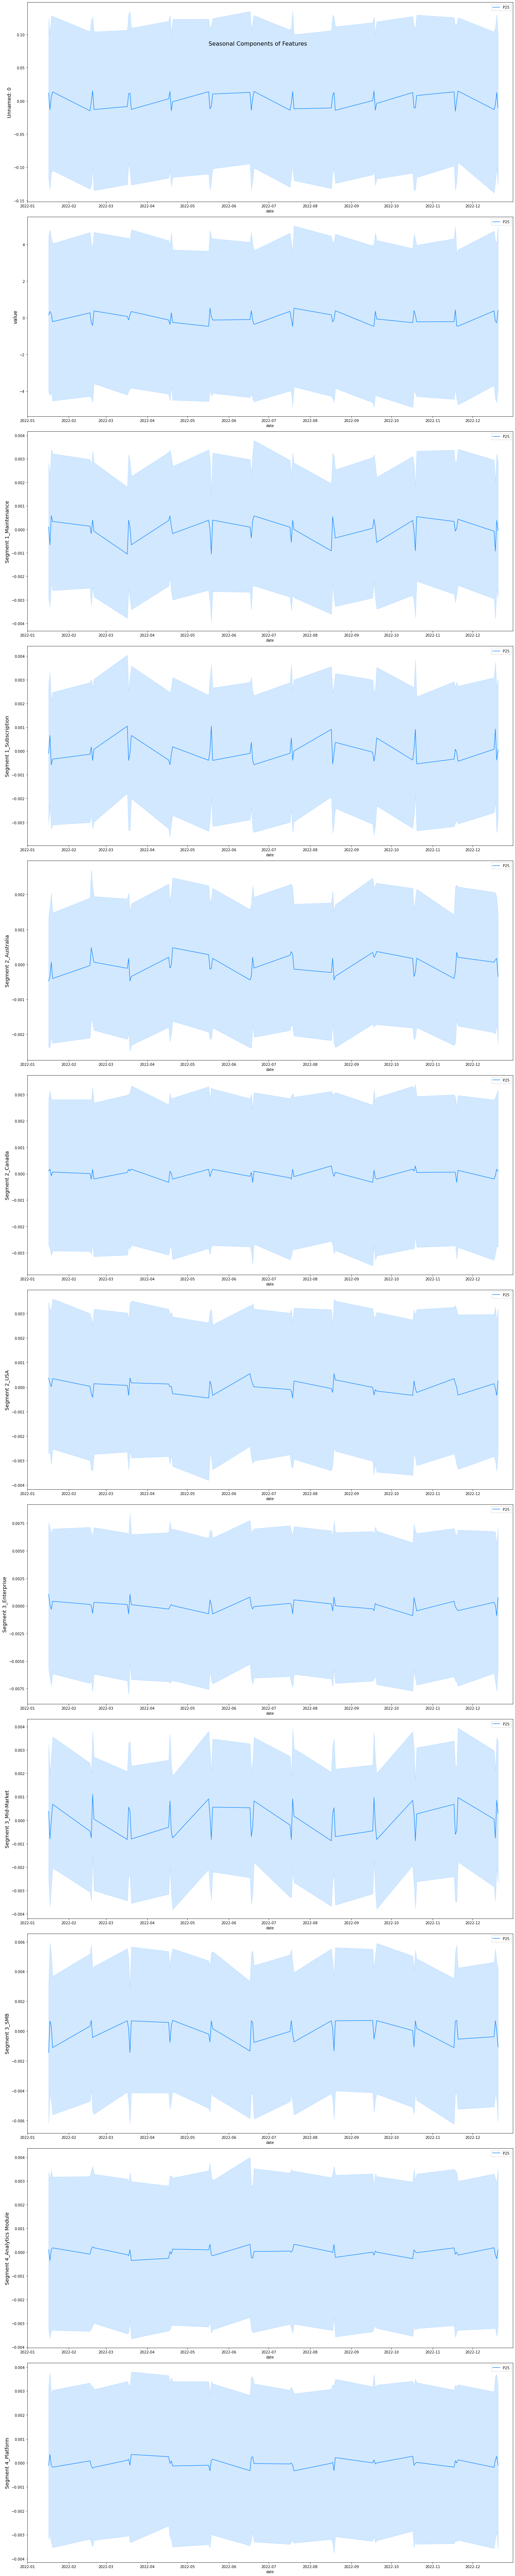

In [133]:
f, ax = plt.subplots(nrows=12, ncols=1, figsize=(20, 100))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df_new4['date'], y=df_new4[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])
    
plt.tight_layout()
plt.show()

### Autocorrelation

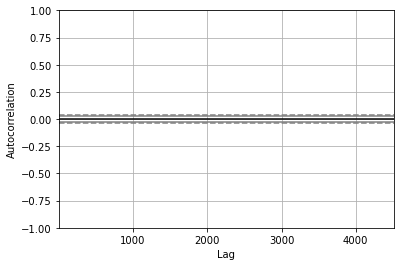

In [121]:
from pandas.plotting import autocorrelation_plot
# using the diffferenced dataset
autocorrelation_plot(df_test2['diff_1'])
plt.show()

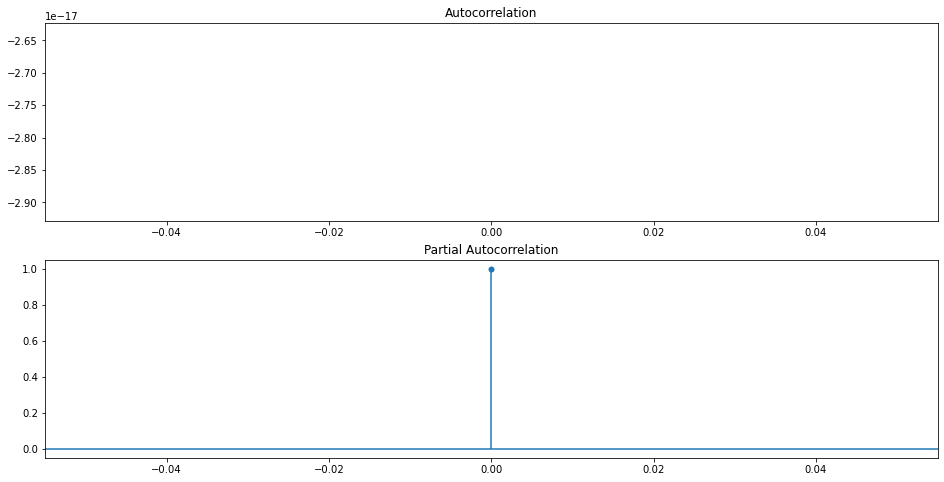

In [120]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_test2['diff_1'], lags=100, ax=ax[0])
plot_pacf(df_test2['diff_1'], lags=100, ax=ax[1])

plt.show()